In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
visa_dataset="/Users/srilakshmidurgachunduri/Documents/NareshIT/Data Science/EDA/Data Files/Visadataset.csv"
visa_df=pd.read_csv(visa_dataset)
visa_df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


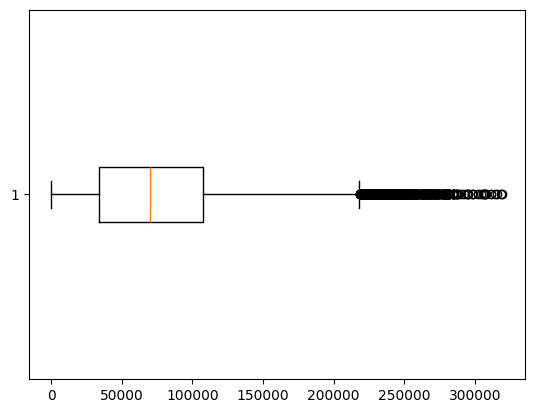

In [6]:
plt.boxplot(visa_df['prevailing_wage'],vert=False)
plt.show()

In [ ]:
# Orange Line is median value 50p data 

#Black dots are outliers

          Q1-1.5IQR   Q1   median  Q3   Q3+1.5IQR
                       |-----:-----|
       o      |--------|     :     |--------|    o  o
                       |-----:-----|
     flier             <----------->            fliers
                            IQR

In [ ]:
Step1: Calculate Q1,Q2,Q3
    
Step2: Calculate IQR (Q3-Q1)
    
Step3: Calculate Upperbound Q3+1.5*IQR
                 Lowerbound Q1-1.5*IQR
    
Step4: 
    
    Find the outliers which are greater than upperbound
    Find the outliers which are lower than lowerbound
    
    

In [ ]:
p_wage=visa_df['prevailing_wage']

In [26]:
# Step-1

Q1=np.quantile(visa_df['prevailing_wage'],0.25)
Q2=np.quantile(visa_df['prevailing_wage'],0.50)
Q3=np.quantile(visa_df['prevailing_wage'],0.75)
#step-2
IQR=Q3-Q1
#step-3
UB=Q3+1.5*IQR
LB=Q1-1.5*IQR
UB,LB
#Step-4
#>UB <LB are the outliers
con1=visa_df['prevailing_wage']>UB
con2=visa_df['prevailing_wage']<LB
#Step-5
# if you apply | with outlier
outliers_df=visa_df[con1|con2]

In [77]:
def outliers(col):
    Q1=np.quantile(visa_df[col],0.25)
    Q2=np.quantile(visa_df[col],0.50)
    Q3=np.quantile(visa_df[col],0.75)
    IQR=Q3-Q1
    UB=Q3+1.5*IQR
    LB=Q1-1.5*IQR
    con1=visa_df[col]>UB
    con2=visa_df[col]<LB
    con11=visa_df[col]<UB
    con22=visa_df[col]>LB
    outlier_df=visa_df[con1|con2]
    non_outlier_df=visa_df[con11&con22]
    print(f" The {col} has {len(outlier_df)} outlier data")
    print(f" The {col} has {len(non_outlier_df)} non outlier data")
    
num_cols=visa_df.select_dtypes(exclude='object').columns
for cols in num_cols:
    outliers(cols)

 The no_of_employees has 1556 outlier data
 The no_of_employees has 23924 non outlier data
 The yr_of_estab has 3260 outlier data
 The yr_of_estab has 22220 non outlier data
 The prevailing_wage has 427 outlier data
 The prevailing_wage has 25053 non outlier data


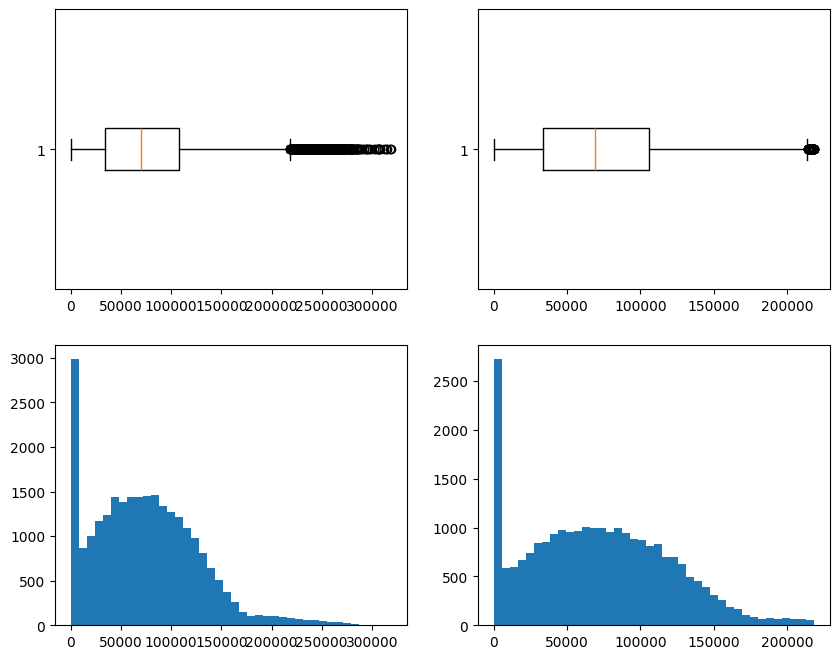

In [60]:
# Will compare
# Total data (25480) vs Non outliers data (25053)
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
plt.boxplot(visa_df['prevailing_wage'],vert=False) # 25480
plt.subplot(2,2,2)
plt.boxplot(non_outliers_df['prevailing_wage'],vert=False) # 25053
plt.subplot(2,2,3)
plt.hist(visa_df['prevailing_wage'],bins=40)
plt.subplot(2,2,4)
plt.hist(non_outliers_df['prevailing_wage'],bins=40)
plt.show()

In [42]:
non_outlier_df=visa_df[con11&con22]

(array([4580., 3368., 3890., 3942., 3507., 2860., 1643.,  706.,  295.,
         262.]),
 array([2.13670000e+00, 2.18113840e+04, 4.36206314e+04, 6.54298787e+04,
        8.72391260e+04, 1.09048373e+05, 1.30857621e+05, 1.52666868e+05,
        1.74476115e+05, 1.96285363e+05, 2.18094610e+05]),
 <BarContainer object of 10 artists>)

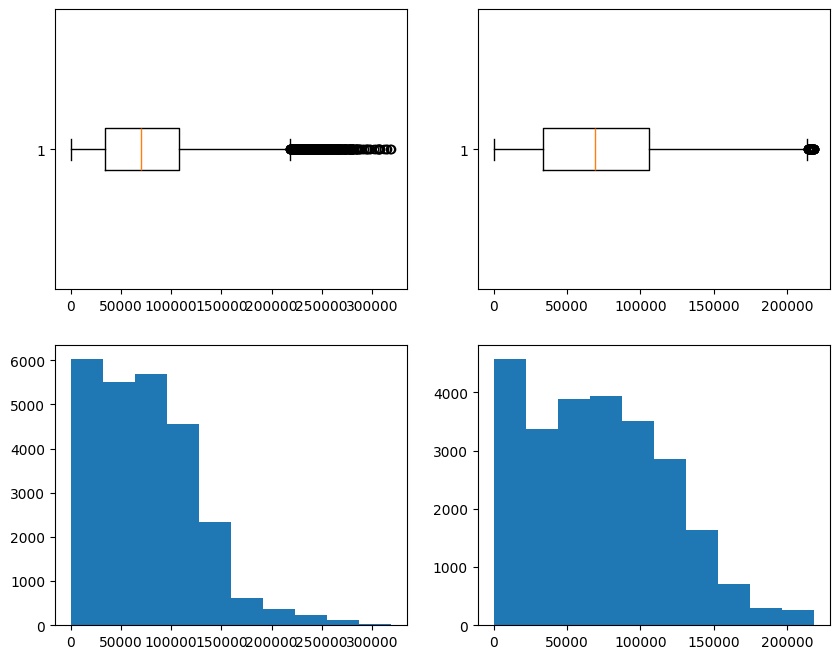

In [61]:
# Will compare prevailing_wage
# Total data (25480) vs Non outliers data (25053)
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
plt.boxplot(visa_df['prevailing_wage'],vert=False)
plt.subplot(2,2,2)
plt.boxplot(non_outlier_df['prevailing_wage'],vert=False)
plt.subplot(2,2,3)
plt.hist(visa_df['prevailing_wage'])
plt.subplot(2,2,4)
plt.hist(non_outlier_df['prevailing_wage'])

### How to deal outliers ###


- Drop the outliers based some percentage 

    - if you have very huge data
    - and the outliers percentage is <2 , then drop the outliers
    - Drop the outliers means , we are removing some rows all the columns
    - In the above examples total count=25480, outliers are =427 , 427*100/25480 = 1.6
    - After removing 427 observations, we have 25053 observation (98% of data)
    
- Impute (Fill) the outliers with Median value

    - We alreday know that outliers doesnt affect Median value
    - So if you dont want loss the data, and you want fill the outliers then use Median
    
- Impute (Fill) with UB and LB values (Capping)

    - Fill the outliers with UB value, which are having >UB
    - Fill the outliers with LB value, which are having <LB

*** Using Median Imputation and concatanation of data frames ***

In [52]:
outliers_df['prevailing_wage']= visa_df['prevailing_wage'].median()
modified_data=outliers_df
#outliers_df['prevailing_wage']= 


In [54]:
pd.merge(non_outlier_df,modified_data,how="outer")
pd.concat([non_outlier_df,modified_data])

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25191,EZYV25192,Asia,Master's,N,N,4983,2005,Midwest,70308.2100,Year,Y,Denied
25195,EZYV25196,North America,Master's,Y,N,47,2001,South,70308.2100,Year,N,Certified
25468,EZYV25469,Asia,Bachelor's,N,N,373,2005,Midwest,70308.2100,Year,N,Certified
25469,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,70308.2100,Year,N,Certified


$ np.where $

In [ ]:
np.where(<Condition>,<True value>,<False Value>)

In [56]:
d1=pd.DataFrame()
d1["Name"]=['Ramesh','Suresh','Mahesh']
d1['Age']=[24,32,28]
d1['Age']=np.where(d1['Age']>25,300,d1['Age'])
d1

,Name,Age
0,Ramesh,24
1,Suresh,300
2,Mahesh,300


{'whiskers': [<matplotlib.lines.Line2D at 0x15b547110>,
 'caps': [<matplotlib.lines.Line2D at 0x15b525450>,
 'boxes': [<matplotlib.lines.Line2D at 0x15b546a50>],
 'medians': [<matplotlib.lines.Line2D at 0x15b525590>],
 'fliers': [<matplotlib.lines.Line2D at 0x15b526090>],
 'means': []}

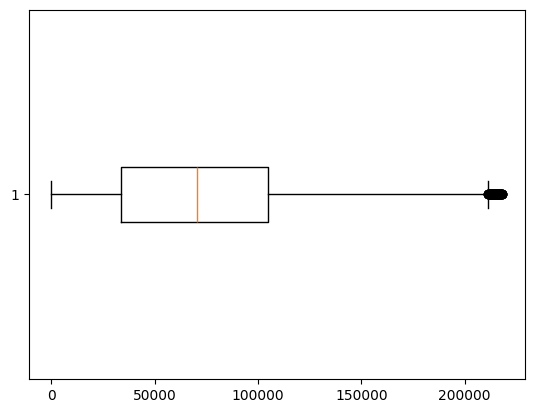

In [74]:
con=con1|con2
visa_df['prevailing_wage']=np.where(con,visa_df['prevailing_wage'].median(),visa_df['prevailing_wage'])
plt.boxplot(visa_df['prevailing_wage'],vert=False)